In [1]:
import numpy as np
import matplotlib.pyplot as plt
import autokeras as ak
import tensorflow as tf
import os

In [2]:
data = np.load('/home/ML4NO/Data/n1000000_0910_all_flat.npz')

In [3]:
data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
target = data['theta23']

x_train = data_all[:10000]
y_train = target[:10000]
x_train2 = data_all[10000:900000]
y_train2 = target[10000:900000]
x_test = data_all[900000:]
y_test = target[900000:]

In [ ]:
clf = ak.StructuredDataRegressor(overwrite=True, max_trials=50)
clf.fit(x_train, y_train,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
       )

In [ ]:
model = clf.export_model()
model.summary()

In [10]:
model.fit(x_train2, y_train2,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
         )

NameError: name 'model' is not defined

In [5]:
model.evaluate(x_test, y_test)
pre_test = model.predict(x_test)

3125/3125 [==============================] - 32s 10ms/step - loss: 0.0017 - mean_squared_error: 0.0017


In [4]:
data = np.load('/home/ML4NO/Data/n1000000_0910_all_flat.npz')
model_index = 1
model = tf.keras.models.load_model('/home/ML4NO/ML_DUNE/Regression/models/0910_theta23_{}.h5'.format(model_index))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 264)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 264)               0         
_________________________________________________________________
normalization (Normalization (None, 264)               529       
_________________________________________________________________
dense (Dense)                (None, 512)               135680    
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0     

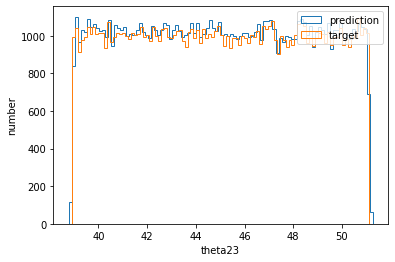

In [6]:
plt.hist(pre_test, histtype = 'step', bins = 100, label = 'prediction')
plt.hist(y_test, histtype = 'step', bins = 100, label = 'target')
plt.xlabel('theta23')
plt.ylabel('number')
plt.legend()
plt.show()

Text(0.5, 1.0, 'theta23')

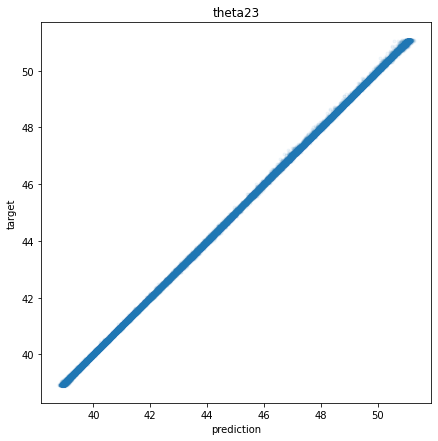

In [7]:
plt.figure(figsize=(7,7))
plt.plot(pre_test, y_test, '.', alpha = 0.05)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('theta23')

In [ ]:
index = 1
while os.path.isfile('/home/ML4NO/ML_DUNE/Regression/models/0910_theta23_{}.h5'.format(index)):
    index += 1
model.save('/home/ML4NO/ML_DUNE/Regression/models/0910_theta23_{}.h5'.format(index))